## Observations and Insights

## Dependencies and starter code

In [75]:
# Dependencies and Setup

import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sts
import numpy as np

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
rx_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")
rx_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


## Summary statistics

In [76]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

stats = summary_table.agg(['mean','median','var','std','sem'])["Tumor Volume (mm3)"]
stats

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [77]:
### Group data by Drug Regimen
summary_table =rx_df.groupby('Drug Regimen')

### Tumor Volume (mm3)
tumor_vol = rx_df['Tumor Volume (mm3)']
tumor_vol.head()

0    45.000000
1    38.825898
2    35.014271
3    34.223992
4    32.997729
Name: Tumor Volume (mm3), dtype: float64

In [78]:
mean_regimen = np.mean(tumor_vol)
print(f"The Mean of all Tumor Volume is  {mean_regimen}")

median_regimen = np.median(tumor_vol)
print(f"The Median of all Tumor Volume is {median_regimen}")

mode_scipy = sts.mode(tumor_vol)
print(f"The Mode of all Tumor Vol is {mode_scipy}")

var_numpy = np.var(tumor_vol)
print(f"The Variance of Tumor Volume using the NumPy module is {var_numpy}")

sd_numpy = np.std(tumor_vol,ddof = 0)
print(f"The Standard Deviation of Tumor Volume using the NumPy module is {sd_numpy}")

The Mean of all Tumor Volume is  50.448380631336505
The Median of all Tumor Volume is 48.95147442
The Mode of all Tumor Vol is ModeResult(mode=array([45.]), count=array([250]))
The Variance of Tumor Volume using the NumPy module is 79.07427999025795
The Standard Deviation of Tumor Volume using the NumPy module is 8.892372011463417


In [79]:
Tumor_vol_means = rx_df.groupby("Drug Regimen").mean()['Tumor Volume (mm3)']
Tumor_vol_means

Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.322552
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64

In [80]:
Tumor_vol_medians = rx_df.groupby("Drug Regimen").median()['Tumor Volume (mm3)']
Tumor_vol_medians

Drug Regimen
Capomulin    41.557809
Ceftamin     51.776157
Infubinol    51.820584
Ketapril     53.698743
Naftisol     52.509285
Placebo      52.288934
Propriva     50.854632
Ramicane     40.673236
Stelasyn     52.431737
Zoniferol    51.818479
Name: Tumor Volume (mm3), dtype: float64

In [81]:
#SEM

## Bar plots

In [ ]:
Reg_and_TV = rx_df[['Drug Regimen','Tumor Volume (mm3)']].total()

# Set the index to be "State" so they will be used as labels
Reg_and_TV = Reg_and_TV.set_index("Drug Regimen")
Reg_and_TV.head()

In [ ]:
# Use DataFrame.plot() in order to create a bar chart of the data
Reg_and_TV.plot(kind="bar", figsize=(20,3))

# Set a title for the chart
plt.bar(x_axis, Reg_and_TV['Tumor Volume (mm3)'], alpha=0.90, align="center")
plt.title("Drugs & Tumors")
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Data Points Per Drug Treatment Regimen')

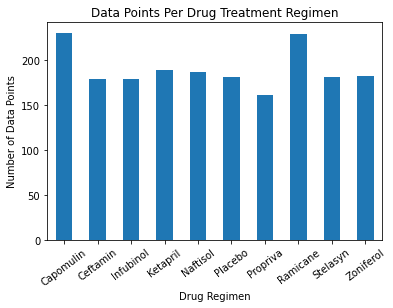

In [90]:
datapts = rx_df.groupby('Drug Regimen').count()['Tumor Volume (mm3)']
panbar = pd.DataFrame(datapts)
also = panbar.plot.bar(legend=False,rot=37)
also
plt.ylabel("Number of Data Points")
plt.title("Data Points Per Drug Treatment Regimen")

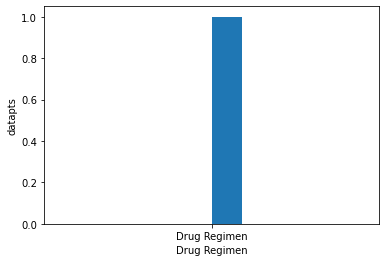

In [93]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
plt.hist("Drug Regimen")
plt.xlabel('Drug Regimen')
plt.ylabel('datapts')
plt.show()

## Pie plots

In [5]:
# Generate a pie plot showing the distribution of female versus male mice using pandas


In [6]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot


## Quartiles, outliers and boxplots

In [7]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 

In [8]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

## Line and scatter plots

In [9]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

In [10]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

In [11]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen